# 实验四

### 姓名：任薏霖
### 学号：2011897
### 专业：物联网工程

In [1]:
import math
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = open('wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
                      #每一类的标准差
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:http://localhost:8889/notebooks/Machine%20Learning/%E5%AE%9E%E9%AA%8C4/%E5%AE%9E%E9%AA%8C4.ipynb
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
        
test_len = [round(len(types[i]) / 10) for i in range(3)]
data_num = sum([len(types[i]) for i in range(3)])

In [3]:
# 训练集和测试集的划分
#分层抽样
def train_test_split(index):
    train_sample1 = []
    train_sample2 = []
    train_sample3 = []
    test_sample   = []
    test_label    = []
    fold          = 5

    for i in range(len(types[0])):
        if i % fold != index:
            train_sample1.append(types[0][i])
        else:
            test_sample.append(types[0][i])
            test_label.append(1)
    for i in range(len(types[1])):
        if i % fold != index:
            train_sample2.append(types[1][i])
        else:
            test_sample.append(types[1][i])
            test_label.append(2)
    for i in range(len(types[2])):
        if i % fold != index:
            train_sample3.append(types[2][i])
        else:
            test_sample.append(types[2][i])
            test_label.append(3)

    train_sample1 = np.array(train_sample1)
    train_sample2 = np.array(train_sample2)
    train_sample3 = np.array(train_sample3)
    
    return train_sample1, train_sample2, train_sample3, test_sample, test_label

### 初级要求 

In [4]:
def cal_wine(sample):
    '''
    mean = 均值
    std = 标准差
    var = 方差
    '''
    wine_mean = np.mean(sample, axis = 0)
    wine_std = np.std(sample, axis = 0)
    wine_var = np.var(sample, axis = 0)
    return wine_mean, wine_var

In [5]:
def Gaussion_Function(test_data, train_data, index):
    train_sample1, train_sample2, train_sample3, test_sample, test_label = train_test_split(index)
    total = len(train_sample1) + len(train_sample2) + len(train_sample3)
    likelihood = 1
    mean, var = cal_wine(train_data)
    prob = (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((test_data - mean) ** 2) / (2 * var))
    #print(prob)
    for i in range(13):
        likelihood = prob[i] * likelihood
    #先验概率
    prior = len(train_data) / total
    return prior * likelihood

In [6]:
#利用贝叶斯分类器进行分类
def Bayes_classificate(index):
    train_sample1, train_sample2, train_sample3, test_sample, test_label = train_test_split(index)
    total     = len(train_sample1) + len(train_sample2) + len(train_sample3)
    pre_label = []
    error_num = 0
    for each in test_sample:
        prob1 = Gaussion_Function(each, train_sample1, index)
        prob2 = Gaussion_Function(each, train_sample2, index)
        prob3 = Gaussion_Function(each, train_sample3, index)
        
        if max([prob1, prob2, prob3]) == prob1:
            pre_label.append(1)
        elif max([prob1, prob2, prob3]) == prob2:
            pre_label.append(2)
        else:
            pre_label.append(3)
            
    for i in range(len(pre_label)):
        if(pre_label[i] != test_label[i]):
            error_num += 1
            
    error_rate = error_num / len(pre_label)
    return round(error_rate, 5), np.array(pre_label)

In [7]:
error_rate, pre_label = Bayes_classificate(1)

In [8]:
#针对全部数据集
for i in range(0, 5):
    error_rate, pre_label = Bayes_classificate(i)
    print("index为{}时:\t  正确率为:  {}  \t错误率为： {}".format(i, 1 - error_rate, error_rate))
    #print(i, 1 - Bayes_classificate(i), Bayes_classificate(i))

index为0时:	  正确率为:  0.97297  	错误率为： 0.02703
index为1时:	  正确率为:  0.94444  	错误率为： 0.05556
index为2时:	  正确率为:  0.94444  	错误率为： 0.05556
index为3时:	  正确率为:  0.97143  	错误率为： 0.02857
index为4时:	  正确率为:  0.97059  	错误率为： 0.02941


### 中级要求

In [9]:
index = 0
#分割训练集和测试集
train_sample1, train_sample2, train_sample3, test_sample, test_label = train_test_split(index)
#获取准确率与各组标签值
accurate, pre_label = Bayes_classificate(index)

In [10]:
pre_score1 = []
pre_score2 = []
pre_score3 = []
for each in test_sample:
        prob1 = Gaussion_Function(each, train_sample1, index)
        prob2 = Gaussion_Function(each, train_sample2, index)
        prob3 = Gaussion_Function(each, train_sample3, index)
        pre_score1.append(prob1)
        pre_score2.append(prob2)
        pre_score3.append(prob3)

In [11]:
#求混淆矩阵
column = np.zeros((3, 3))
for i in range(len(test_label)):
        column[int(test_label[i]) - 1, pre_label[i] - 1] += 1
        
TP_1 = column[0, 0]
FN_1 = column[0, 1] + column[0, 2]
FP_1 = column[1, 0] + column[2, 0]
TN_1 = column[1, 1] + column[1, 2] + column[2, 1] + column[2, 2]

TP_2 = column[1, 1]
FN_2 = column[1, 0] + column[1, 2]
FP_2 = column[0, 1] + column[2, 1]
TN_2 = column[0, 0] + column[0, 2] + column[2, 0] + column[2, 2]

TP_3 = column[2, 2]
FN_3 = column[2, 0] + column[2, 1]
FP_3 = column[0, 2] + column[1, 2]
TN_3 = column[0, 0] + column[0, 1] + column[1, 0] + column[1, 1]

In [12]:
TP_1, FP_1, FN_1, TN_1

(11.0, 0.0, 1.0, 25.0)

In [42]:
def draw_confusion(TP, FP, FN, TN):
    confusion = np.array(([TP, FP], [FN, TN]))
    '''
    precision = 精度
    recall = 召回率
    accuracy = 准确率
    '''
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F_measure = 2 / (1 / precision + 1 / recall)
    
    plt.matshow(confusion, cmap=plt.cm.Reds)
    #plt.style.use('seaborn')
    indices = range(len(confusion))
    plt.xticks(indices, ['0', '1'])
    plt.yticks(indices, ['0', '1'])
    plt.colorbar()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion')
    # plt.rcParams两行是用于解决标签不能显示汉字的问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 显示数据
    for first_index in range(len(confusion)):  # 第几行
        for second_index in range(len(confusion[first_index])):  # 第几列
            plt.text(first_index, second_index, confusion[first_index][second_index])
    # 在matlab里面可以对矩阵直接imagesc(confusion)
    # 显示
    plt.show()
    
    
    print("精度为:{}  召回率为:{}  F值为:{}".format(precision, recall, F_measure))

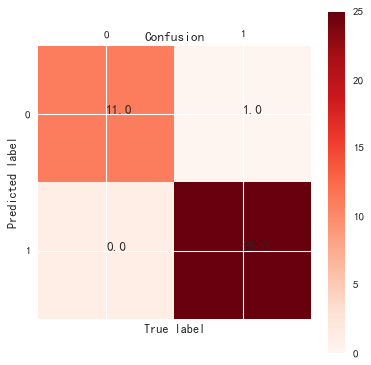

精度为:1.0  召回率为:0.9166666666666666  F值为:0.9565217391304348


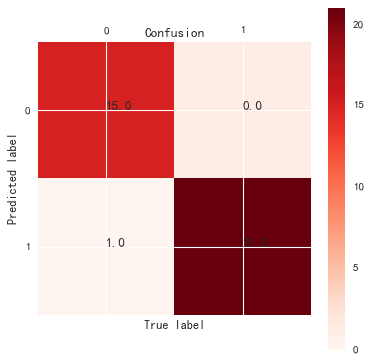

精度为:0.9375  召回率为:1.0  F值为:0.9677419354838711


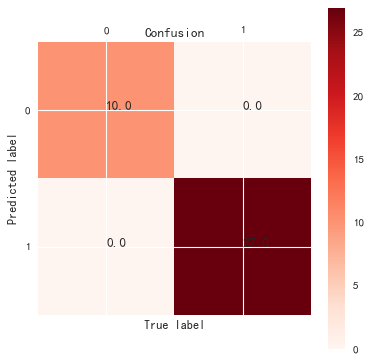

精度为:1.0  召回率为:1.0  F值为:1.0


In [43]:
draw_confusion(TP_1, FP_1, FN_1, TN_1)
draw_confusion(TP_2, FP_2, FN_2, TN_2)
draw_confusion(TP_3, FP_3, FN_3, TN_3)

### 高级要求

In [15]:
#绘制ROC曲线计算AUC值
def RocAuc(pre_score, testlabel):
    fpr = []
    tpr = []
    Auc = 0
     
    for i in np.argsort(pre_score)[::-1]:
        threshold = pre_score[i]
        if threshold == np.max(pre_score):
            fpr.append(0)
            tpr.append(0)
            continue
        elif threshold == np.min(pre_score):
            fpr.append(1)
            tpr.append(1)
            continue
        TP, FP, FN, TN = 0, 0, 0, 0
        for j in np.argsort(pre_score)[::-1]:
            if pre_score[j] >= threshold:
                if test_label[j] == testlabel:
                    TP += 1
                else:
                    FP += 1
            else:
                if test_label[j] == testlabel:
                    FN += 1
                else:
                    TN += 1
        fpr.append(FP / (FP + TN))
        tpr.append(TP / (TP + FN))
    
    for i in range(1, len(fpr)):
        Auc += 0.5 * (fpr[i] - fpr[i - 1]) * (tpr[i] + tpr[i - 1])
        
    plt.style.use('seaborn-ticks')   
    plt.title('ROC curve')
    plt.plot(fpr, tpr, label = 'ROC', color = 'darkred')
    plt.legend()
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体，不然中文无法显示
    #plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    #plt.grid()
    print("Auc为:   {}  ".format(Auc))
    plt.show()

Auc为:   0.9866666666666667  


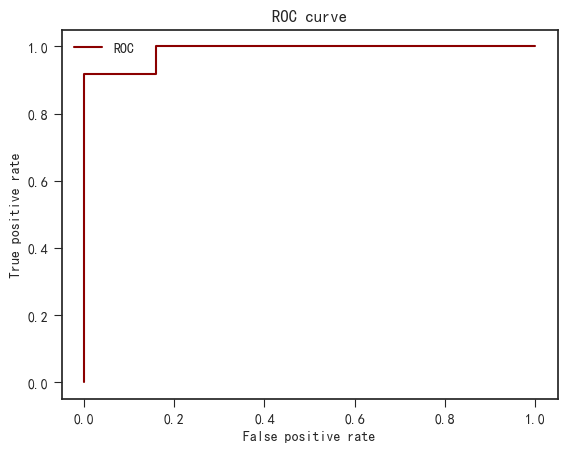

Auc为:   0.9454545454545454  


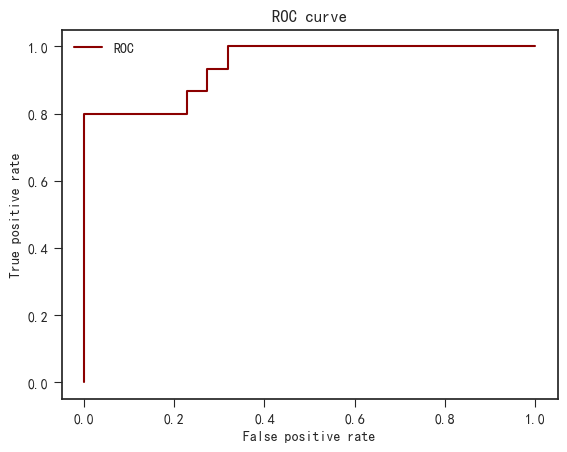

Auc为:   1.0  


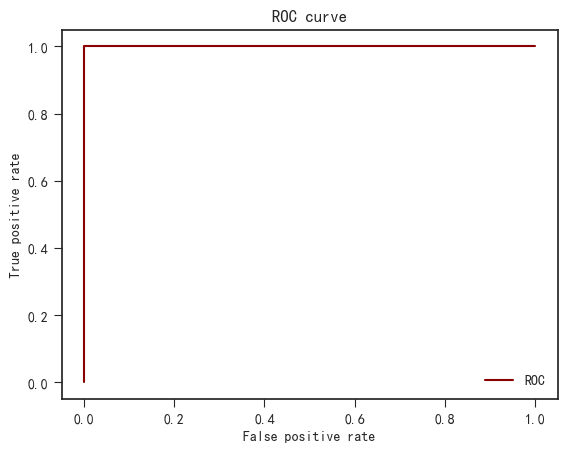

In [16]:
#可视化结果
RocAuc(pre_score1,1)
RocAuc(pre_score2,2)
RocAuc(pre_score3,3)